# Simple Neuron
- inputs --> features
- features assigned weights based on contribution to prediction
- bias helps in controlling the value at which activation function will trigger.
- bias is essential to create an optmal fit, it allows for the activation threshold to move to the left/right.
- More the weight, earlier trigger of the activation function.

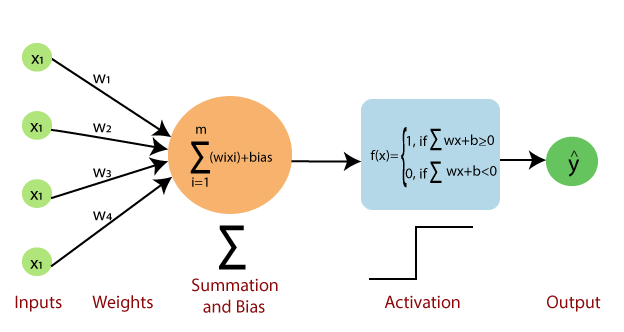

# Neural Net Architecture
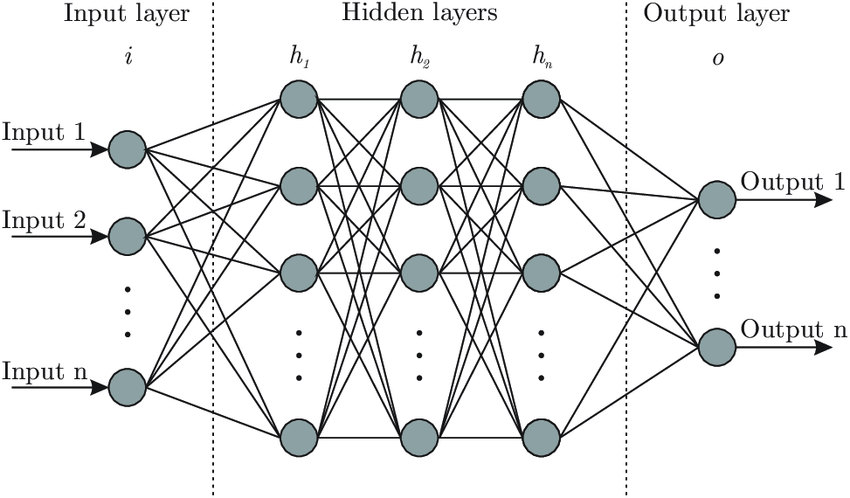

# Back Prop
- make a prediction, confirm if true prediction or not.
- if mistake made, back propogate the error through the network and readjust weights and biases to predict correctly.
- repeat for each sample until a global optimum achived for predicting the inputs.
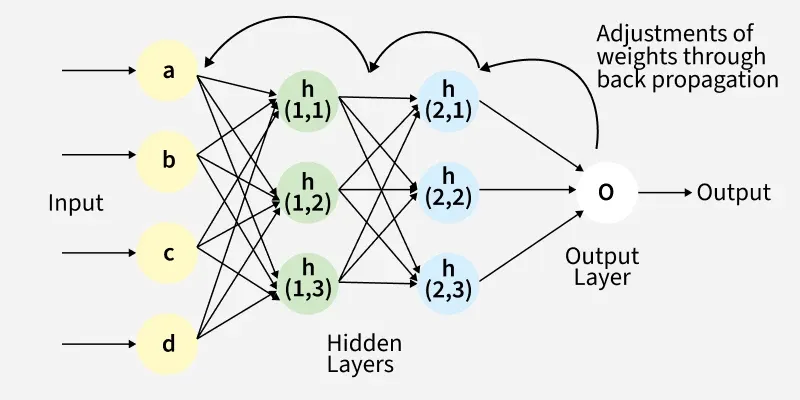



In [ ]:
import warnings
warnings.filterwarnings('ignore')

#### Neural networks: mimic biological neural nets to learn from inputs and draw conclusions.

'''
Difference between PyTorch, TensorFlow and Keras
- Pytorch(FaceBook), TensorFlow (Google), CNTK (microsoft) ---> DL frameworks
- Keras ---> wrapper around TensorFlow, CNTK and theano 
'''

# mnist handwritten digits classification using ANN
# input image ---> flatten the 2D image/pixel bitmap [0,255] 
# input neurons will be the feature vector for the flattened pixel values

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow import keras
import seaborn as sns

In [45]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

In [46]:
print("Training Samples: ", len(X_train))
print("Testing Samples: ", len(X_test))

Training Samples:  60000
Testing Samples:  10000


In [47]:
print(np.shape(X_train[0]))

(28, 28)


In [48]:
X_train[0]


array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

label:  5


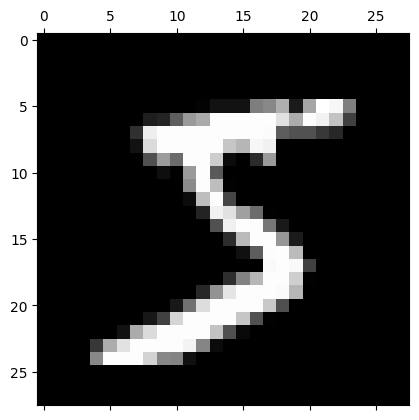

In [49]:
plt.matshow(X_train[0])
print("label: ", y_train[0])

In [50]:
### Flatten the train set

## We need a feature vector containing all 60000 training examples as 1D vector of 28x28 entries each.
flattened_X_train = X_train.reshape(len(X_train), 28*28)
flattened_X_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], shape=(60000, 784), dtype=uint8)

In [51]:
### Flatten the test set

flattened_X_test = X_test.reshape(len(X_test), 28*28)
flattened_X_test

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], shape=(10000, 784), dtype=uint8)

In [ ]:
### Creating a neural net with 1 Input Layer and 1 Output Layer

# 784 neurons in the input layer ---> 784 feature entries per sample
# 10 neurons in the output layer ---> 10 classes

# dense ensures each neuron in adcant layers are interconnected
unscaled_model = keras.Sequential([
    keras.layers.Dense(10, # number of output neurons
                       input_shape=(784,), # shape of input/ number of nodes in the input
                       activation='sigmoid')
])

unscaled_model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

unscaled_model.fit(flattened_X_train, y_train, epochs=5)

### With unscaled input data ---> 32% accurate

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 737us/step - accuracy: 0.3413 - loss: 9.3186 
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 829us/step - accuracy: 0.3469 - loss: 6.0151
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 722us/step - accuracy: 0.3374 - loss: 5.7255
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 724us/step - accuracy: 0.3273 - loss: 5.5433
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 750us/step - accuracy: 0.3125 - loss: 5.3640


In [ ]:
### Scaling data between 0 and 1 ---> Normalization

X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

scaled_X_train_flattened = X_train_scaled.reshape(len(X_train_scaled), 28*28)
scaled_X_test_flattened = X_test_scaled.reshape(len(X_test_scaled), 28*28)

X_train_scaled # all vals between 0 and 1

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [ ]:
scaled_model = keras.Sequential([
    keras.layers.Dense(
        10,
        input_shape=(784,),
        activation='sigmoid'
    )
])

scaled_model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

scaled_model.fit(scaled_X_train_flattened, y_train, epochs=5)

#### Accuracy jumps to 92.57%

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 731us/step - accuracy: 0.8786 - loss: 0.4640
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 722us/step - accuracy: 0.9156 - loss: 0.3037
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 763us/step - accuracy: 0.9208 - loss: 0.2830
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 730us/step - accuracy: 0.9240 - loss: 0.2731
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 722us/step - accuracy: 0.9257 - loss: 0.2666


In [ ]:
scaled_model.evaluate(scaled_X_test_flattened, y_test)

# 92.48% accuracy on the test set

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 717us/step - accuracy: 0.9248 - loss: 0.2697


[0.26971885561943054, 0.9247999787330627]

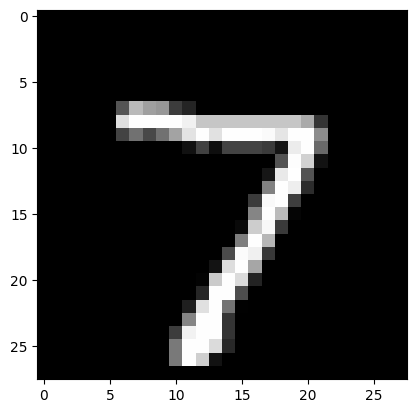

In [72]:
plt.imshow(X_test[0])

In [73]:
predictions = scaled_model.predict(scaled_X_test_flattened)
predictions[0]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 447us/step


array([2.64162887e-02, 3.82536058e-07, 5.27419895e-02, 9.60776389e-01,
       1.84851664e-03, 1.38739064e-01, 1.07590347e-06, 9.99793649e-01,
       1.08320214e-01, 6.25433683e-01], dtype=float32)

In [ ]:
print("prediction: ", np.argmax(predictions[0]))
### predicts 7 and the image is 7

prediction:  7


In [75]:
#### saving model predictions into an array as whole numbers instead of scores

predictions_labels = [np.argmax(i) for i in predictions]
predictions_labels[:10] #### first 10 predictions as whole numbers

[np.int64(7),
 np.int64(2),
 np.int64(1),
 np.int64(0),
 np.int64(4),
 np.int64(1),
 np.int64(4),
 np.int64(9),
 np.int64(6),
 np.int64(9)]

In [76]:
### True Labels for the first 5 images

true_labels = y_test
true_labels[:10]



array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9], dtype=uint8)

In [77]:
conf = tf.math.confusion_matrix(true_labels, predictions_labels)
conf

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 966,    0,    1,    2,    0,    5,    3,    2,    1,    0],
       [   0, 1109,    3,    2,    0,    1,    4,    2,   14,    0],
       [   8,    9,  916,   18,    8,    5,   13,   10,   42,    3],
       [   4,    0,   13,  921,    0,   28,    2,   12,   24,    6],
       [   2,    1,    2,    2,  914,    0,   11,    4,   12,   34],
       [   8,    2,    2,   25,    6,  797,   13,    4,   30,    5],
       [  15,    3,    6,    1,    7,   20,  901,    2,    3,    0],
       [   1,    5,   21,    9,    8,    0,    0,  950,    5,   29],
       [   7,    7,    7,   25,    9,   29,    8,   11,  866,    5],
       [  11,    7,    1,   11,   28,    9,    0,   27,    7,  908]],
      dtype=int32)>